In [47]:
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print(tf.__version__)

2.17.0


In [24]:
df = pd.read_csv('Glyphs_TMNIST_updated.csv')

In [25]:
df.head()

,font_name,glyph_name,label,1,2,3,4,5,6,7,...,775,776,777,778,779,780,781,782,783,784
0,ABeeZee-Regular,LATIN CAPITAL LETTER A,A,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABeeZee-Regular,LATIN CAPITAL LETTER B,B,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABeeZee-Regular,LATIN CAPITAL LETTER C,C,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABeeZee-Regular,LATIN CAPITAL LETTER D,D,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABeeZee-Regular,LATIN CAPITAL LETTER E,E,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
arr = np.array(df['font_name'])
classes = pd.unique(arr)

3019


In [74]:
X = df.drop(columns=['font_name',"glyph_name","label"])
y = df['font_name']
le = LabelEncoder()
y = le.fit_transform(y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [52]:
X_train = np.array(X_train / 255.0)
X_test = np.array(X_test / 255.0)

In [53]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

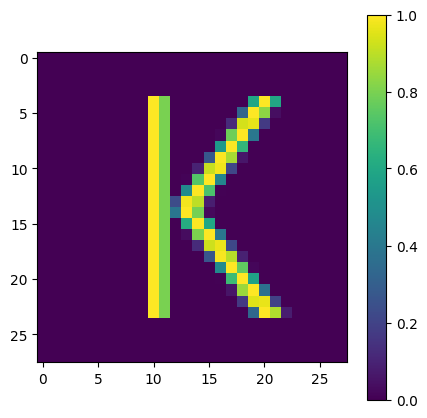

In [54]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [92]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(3019)
])

In [93]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [89]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
 1330/14133 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - accuracy: 0.0018 - loss: 7.8847


KeyboardInterrupt



In [64]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()]) 

In [66]:
predictions = probability_model.predict(X_test)

3534/3534 ━━━━━━━━━━━━━━━━━━━━ 3s 775us/step


In [71]:
classes[np.argmax(predictions[1])]

'BarlowCondensed-ThinItalic'

In [72]:
classes[y_test[1]]

'FiraSansExtraCondensed-Thin'